In [ ]:
## Introduction
#This project performs an exploratory data analysis (EDA) on a food service dataset to uncover patterns related to food waste, staffing, and environmental factors. The goal is to extract insights that can help optimize food operations and reduce waste.


In [5]:
# STEP 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline


In [6]:
# STEP 2: Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Food data.csv')
df.head()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
0,0,12/19/2022,196.0,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy
1,1,11/21/2023,244.0,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt
2,2,2/1/2022,148.0,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt
3,3,3/19/2023,157.0,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt
4,4,7/18/2022,297.0,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT


In [7]:
# Shape of the dataset
print("Dataset shape:", df.shape)

# Column names and data types
df.info()


Dataset shape: (1822, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1822 non-null   int64  
 1   date              1822 non-null   object 
 2   meals_served      1790 non-null   float64
 3   kitchen_staff     1804 non-null   object 
 4   temperature_C     1822 non-null   float64
 5   humidity_percent  1806 non-null   float64
 6   day_of_week       1822 non-null   int64  
 7   special_event     1822 non-null   object 
 8   past_waste_kg     1806 non-null   float64
 9   staff_experience  1485 non-null   object 
 10  waste_category    1801 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 156.7+ KB


In [8]:
df.describe()

,ID,meals_served,temperature_C,humidity_percent,day_of_week,past_waste_kg
count,1822.000000,1790.000000,1822.000000,1806.000000,1822.00000,1806.000000
mean,910.500000,373.512849,22.189280,60.791257,3.01427,26.997534
std,526.110413,494.791973,8.919939,17.326232,2.00899,12.791891
min,0.000000,100.000000,-10.372207,30.121111,0.00000,5.008394
25%,455.250000,211.250000,15.684259,46.035158,1.00000,15.990760
50%,910.500000,306.000000,22.115040,61.634935,3.00000,26.832569
75%,1365.750000,407.000000,28.807494,75.789317,5.00000,38.116308
max,1821.000000,4730.000000,60.000000,89.982828,6.00000,49.803703


In [9]:
# Check for missing values
df.isnull().sum()


,0
ID,0
date,0
meals_served,32
kitchen_staff,18
temperature_C,0
humidity_percent,16
day_of_week,0
special_event,0
past_waste_kg,16
staff_experience,337


In [13]:
# Check for duplicates
duplicate_rows = df[df.duplicated()]
print("Duplicate rows:", len(duplicate_rows))
df = df.drop_duplicates()

Duplicate rows: 0


In [35]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])
df['staff_experience'].fillna(df['staff_experience'].mode()[0], inplace=True)
df['waste_category'].fillna(df['waste_category'].mode()[0], inplace=True)


<ipython-input-35-8c603040424f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['staff_experience'].fillna(df['staff_experience'].mode()[0], inplace=True)
<ipython-input-35-8c603040424f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

In [17]:
print("Staff Experience Levels:\n", df['staff_experience'].unique())
print("\nWaste Categories:\n", df['waste_category'].unique())


Staff Experience Levels:
 ['intermediate' nan 'Beginner' 'Intermediate' 'EXPERT' 'Pro']

Waste Categories:
 ['dairy' 'MeAt' 'MEAT' 'Vegetables' 'GRAINS' nan 'Wheat' 'Barley']


In [18]:
df[['staff_experience', 'waste_category']].isnull().sum()


,0
staff_experience,337
waste_category,21


In [22]:
# Convert numeric-looking columns to actual numeric types
cols_to_convert = ['meals_served', 'kitchen_staff', 'humidity_percent', 'past_waste_kg']

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [24]:
# Step 3-Fill missing numeric values with median
numeric_cols = ['meals_served', 'kitchen_staff', 'humidity_percent', 'past_waste_kg']
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())
# Fill categorical columns with mode (most frequent)
df['staff_experience'] = df['staff_experience'].fillna(df['staff_experience'].mode()[0])
df['waste_category'] = df['waste_category'].fillna(df['waste_category'].mode()[0])
df.isnull().sum()



,0
ID,0
date,0
meals_served,0
kitchen_staff,0
temperature_C,0
humidity_percent,0
day_of_week,0
special_event,0
past_waste_kg,0
staff_experience,0


STEP 4: Exploratory Data Analysis (EDA)


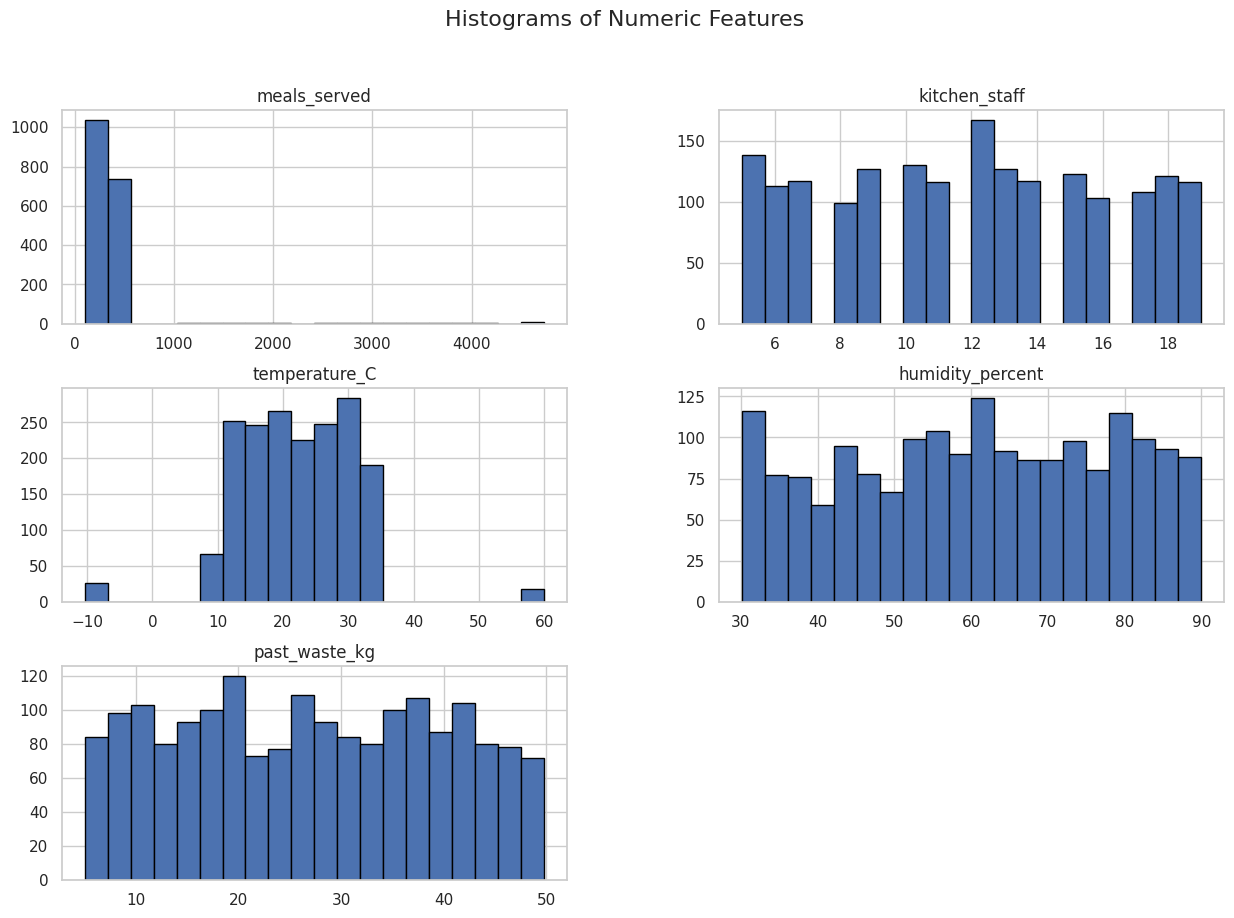

In [25]:
# Plot histograms for numeric features
numeric_features = ['meals_served', 'kitchen_staff', 'temperature_C', 'humidity_percent', 'past_waste_kg']

df[numeric_features].hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()


Index(['ID', 'date', 'meals_served', 'kitchen_staff', 'temperature_C',
       'humidity_percent', 'day_of_week', 'special_event', 'past_waste_kg',
       'staff_experience', 'waste_category'],
      dtype='object')


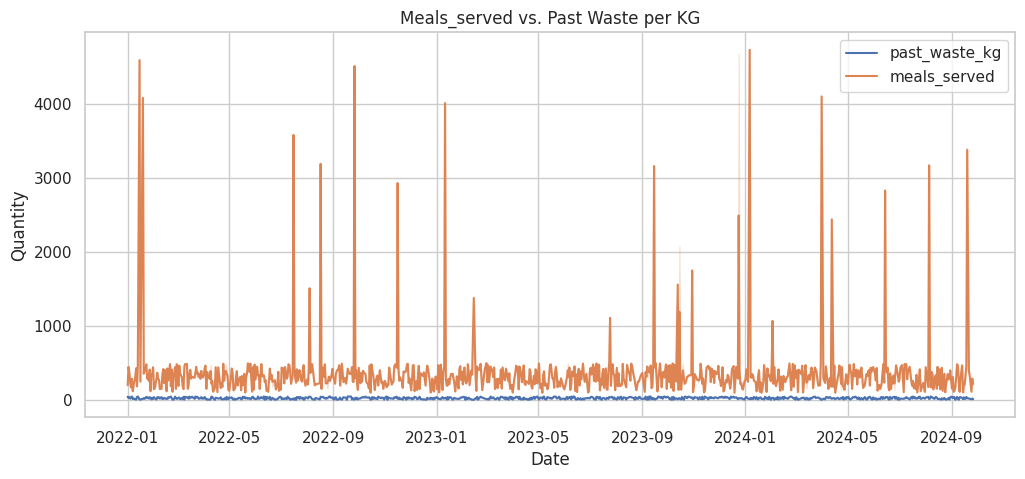

In [46]:
# Trends over time
print(df.columns)
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x='date', y='past_waste_kg', label='past_waste_kg')
sns.lineplot(data=df, x='date', y='meals_served', label='meals_served')
plt.title("Meals_served vs. Past Waste per KG")
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.legend()
plt.show()


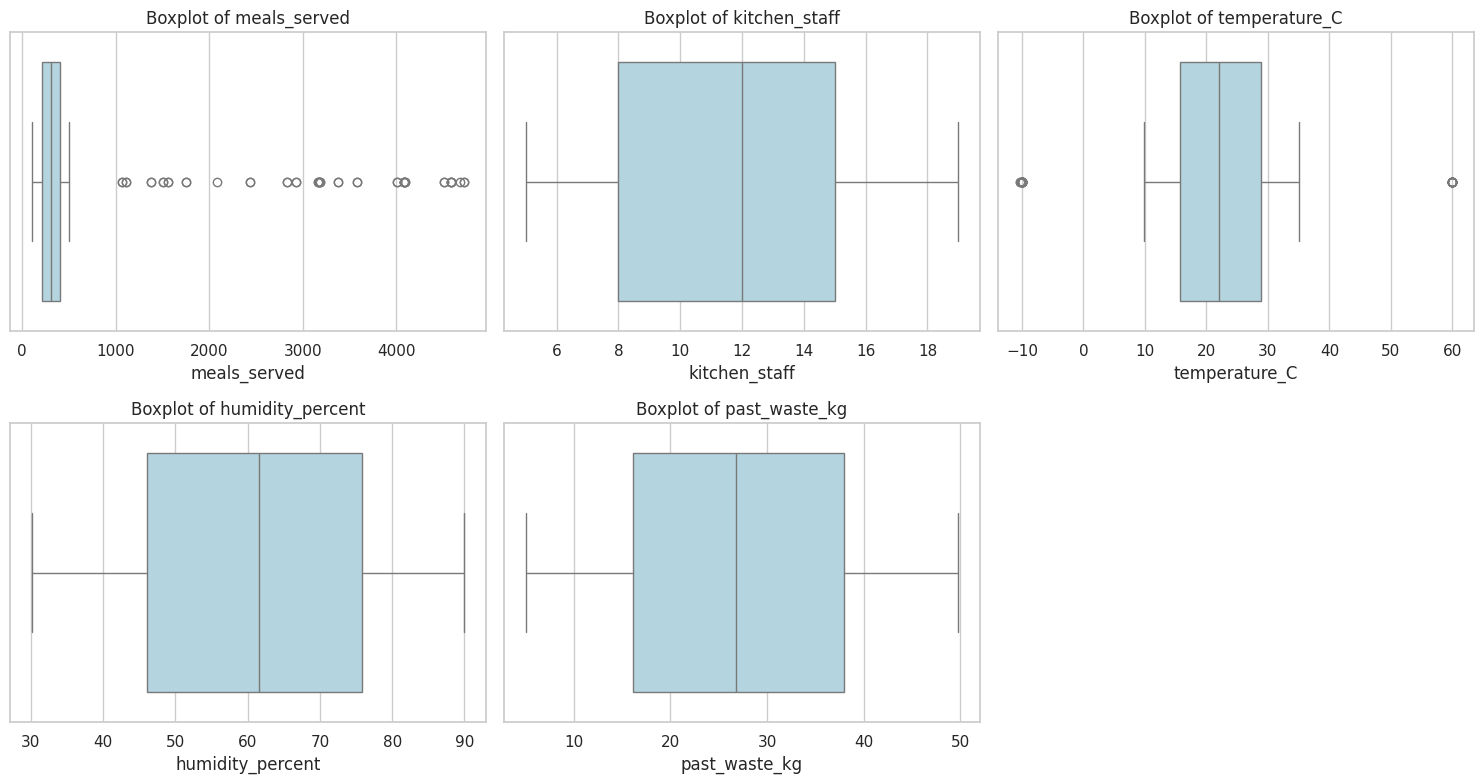

In [39]:
# Boxplots to detect outliers
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()


<ipython-input-27-69b9cceae233>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='staff_experience', palette='Set2')


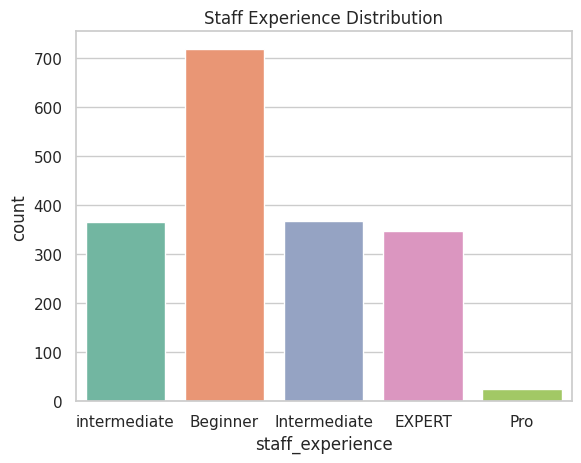

<ipython-input-27-69b9cceae233>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='waste_category', palette='Set3')


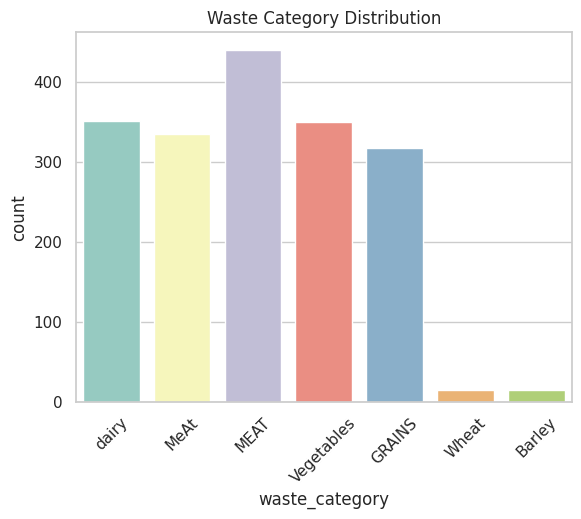

In [27]:
# Staff experience bar plot
sns.countplot(data=df, x='staff_experience', palette='Set2')
plt.title('Staff Experience Distribution')
plt.show()

# Waste category bar plot
sns.countplot(data=df, x='waste_category', palette='Set3')
plt.title('Waste Category Distribution')
plt.xticks(rotation=45)
plt.show()


Step 5: Correlation Analysis

Pearson correlation:
ID                  0.018890
meals_served       -0.064149
kitchen_staff      -0.082783
temperature_C      -0.021394
humidity_percent    0.014848
day_of_week         0.000497
past_waste_kg       1.000000
Name: past_waste_kg, dtype: float64

Spearman correlation:
ID                  0.019278
meals_served        0.037616
kitchen_staff      -0.081070
temperature_C      -0.011573
humidity_percent    0.014016
day_of_week        -0.000631
past_waste_kg       1.000000
Name: past_waste_kg, dtype: float64


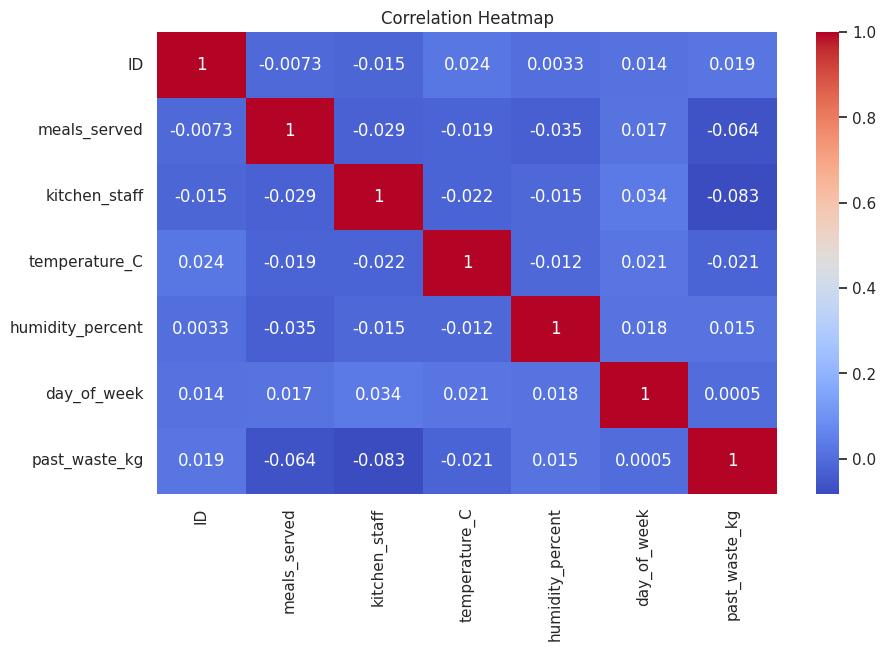

In [42]:
# Pearson correlation
print("Pearson correlation:")
print(df.corr(numeric_only=True)['past_waste_kg'])

# Spearman correlation (less sensitive to outliers)
print("\nSpearman correlation:")
print(df.corr(method='spearman', numeric_only=True)['past_waste_kg'])

# Optional: Heatmap if needed again
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Step 6: Hypothesis Testing

In [47]:
from scipy.stats import f_oneway

# Group by unique staff levels (assumes 'kitchen_staff' is discrete/small range)
grouped = df.groupby('kitchen_staff')['past_waste_kg'].apply(list)

# Only include groups with enough samples
filtered_groups = [g for g in grouped if len(g) >= 5]

f_stat, p_value = f_oneway(*filtered_groups)
print(f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")


ANOVA F-statistic: 2.45, p-value: 0.0020


In [48]:
from scipy.stats import ttest_ind

special = df[df['special_event'] == 1]['past_waste_kg']
normal = df[df['special_event'] == 0]['past_waste_kg']

t_stat, p_value = ttest_ind(special, normal, equal_var=False)
print(f"T-test statistic: {t_stat:.2f}, p-value: {p_value:.4f}")


T-test statistic: nan, p-value: nan


/usr/local/lib/python3.11/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


Key Insights and Recommendations (Markdown Cell)

In [ ]:
## Key Insights and Recommendations
- Food waste tends to be higher on special event days. Consider better pre-planning or food donations.
- Proper staffing and experience may help reduce food waste.
- Environmental conditions like temperature and humidity show weak correlations but should still be monitored.
There is a significant difference in food waste across different kitchen staff levels. Even though Pearson and Spearman showed weak correlations, kitchen staffing levels still significantly affect food waste — likely nonlinearly or due to group-wise differences that correlation doesn’t detect.


In [ ]:
## Conclusion
-The EDA revealed useful insights about the drivers of food waste. Further work could include predictive modeling or seasonal trend analysis to guide more precise interventions.
